<a href="https://colab.research.google.com/github/krishnaa30000/Plate-no-recognition-project/blob/main/Copy_of_Plate_no_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [3]:
! pip install easyocr
! pip install imutils
! pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.4 MB/s eta 0:00:00


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr
from google.colab.patches import cv2_imshow

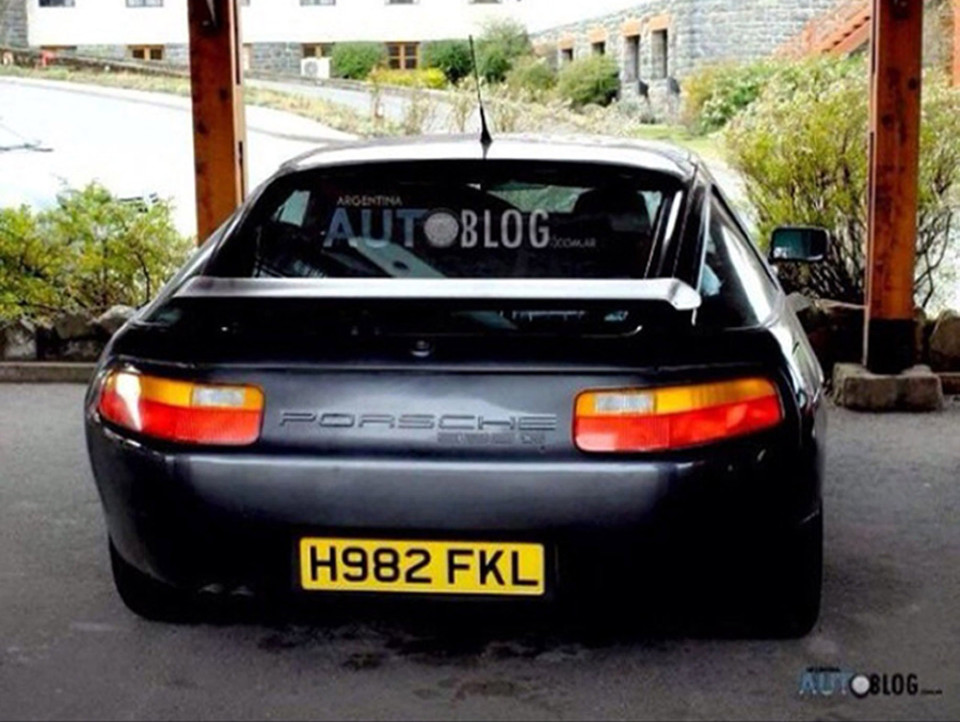

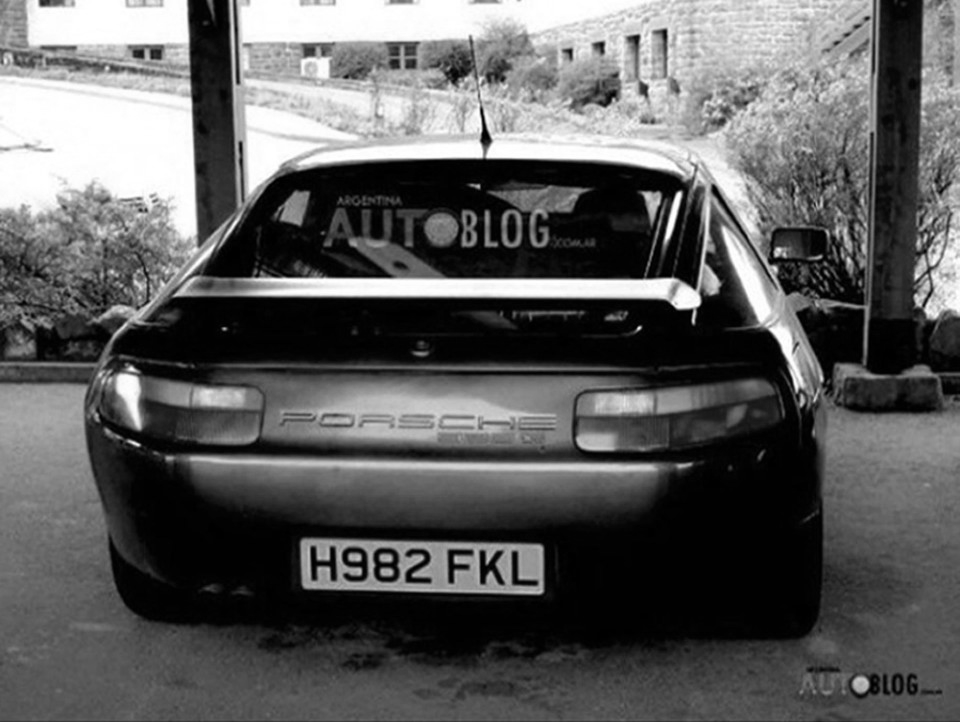

In [50]:
img=cv2.imread('/content/image4.jpg')


type(img)
cv2_imshow(img)

gray_scale_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

cv2_imshow(gray_scale_img)

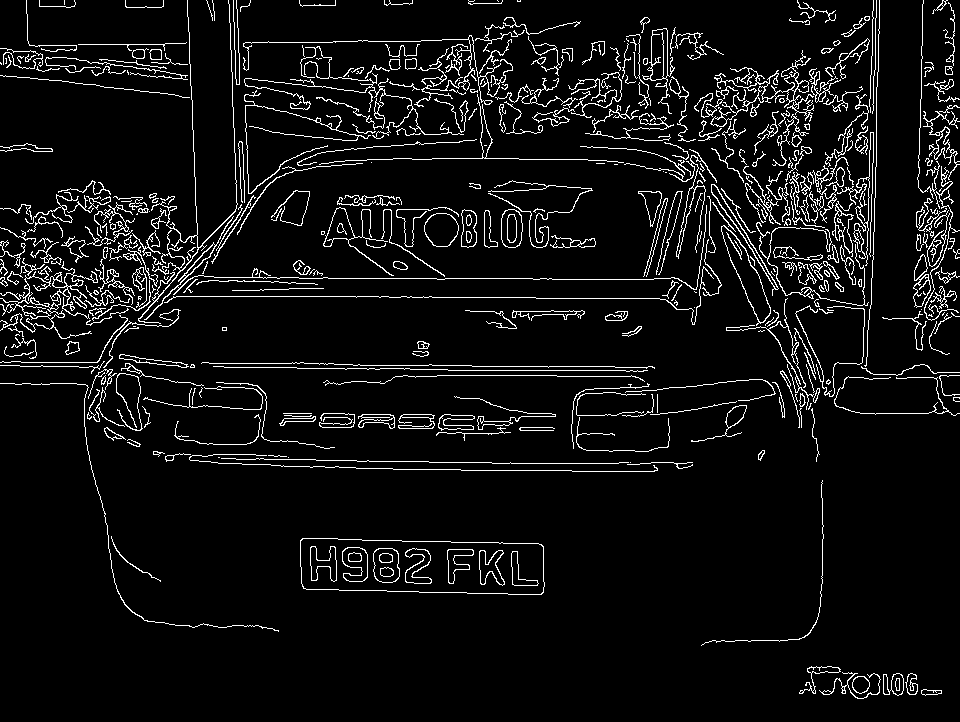

In [51]:
bfilter=cv2.bilateralFilter(gray_scale_img, 11, 17,17)
edged=cv2.Canny(bfilter,30,200)
cv2_imshow(edged)

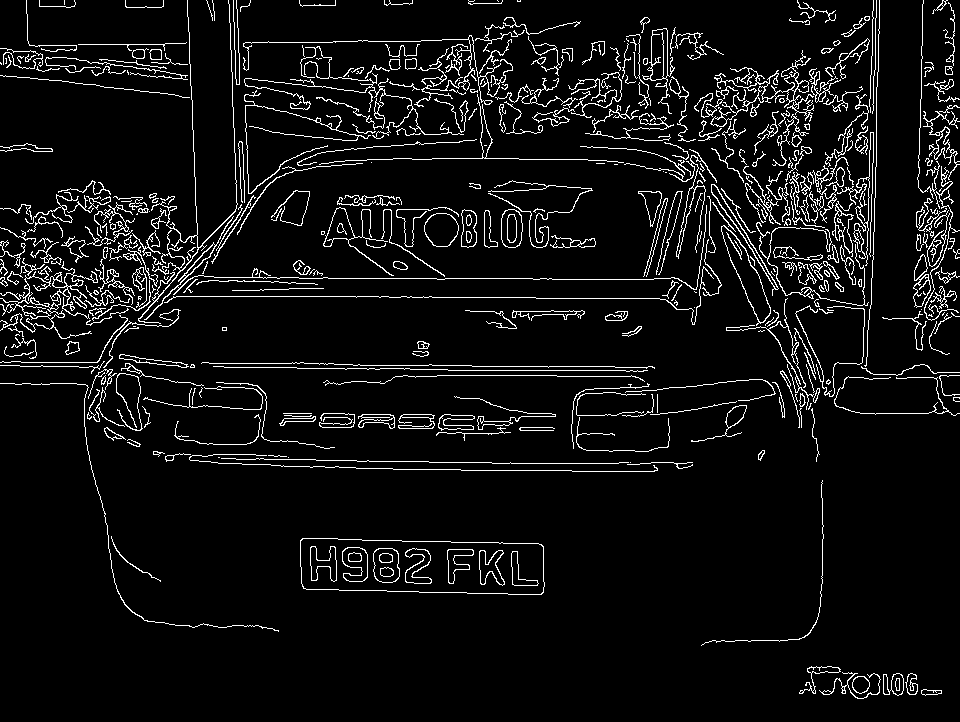

In [52]:
bfilter=cv2.bilateralFilter(gray_scale_img, 11, 17,17)
edged=cv2.Canny(bfilter,30,200)
cv2_imshow(edged)

In [54]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)
print(contours)
type(contours)
len(contours)

[array([[[302, 538]],

       [[300, 540]],

       [[300, 566]],

       [[301, 567]],

       [[301, 583]],

       [[302, 584]],

       [[302, 586]],

       [[303, 587]],

       [[303, 588]],

       [[305, 588]],

       [[306, 589]],

       [[338, 589]],

       [[339, 590]],

       [[386, 590]],

       [[387, 591]],

       [[418, 591]],

       [[419, 592]],

       [[466, 592]],

       [[467, 593]],

       [[507, 593]],

       [[508, 594]],

       [[541, 594]],

       [[543, 592]],

       [[543, 587]],

       [[544, 586]],

       [[544, 582]],

       [[543, 581]],

       [[543, 546]],

       [[541, 544]],

       [[539, 544]],

       [[538, 543]],

       [[503, 543]],

       [[502, 542]],

       [[501, 542]],

       [[500, 543]],

       [[499, 543]],

       [[498, 542]],

       [[451, 542]],

       [[450, 541]],

       [[402, 541]],

       [[401, 540]],

       [[362, 540]],

       [[361, 539]],

       [[338, 539]],

       [[337, 538]]], dtype=int

664

In [56]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx) == 4:
    location=approx
    break




In [55]:
 print(location)

[[[263 334]]

 [[264 363]]

 [[369 362]]

 [[366 333]]]


In [57]:
mask=np.zeros(gray_scale_img.shape , np.uint8)
new_image=cv2.drawContours(mask,[location],0 , 255,-1)
new_image=cv2.bitwise_and(img, img, mask=mask)


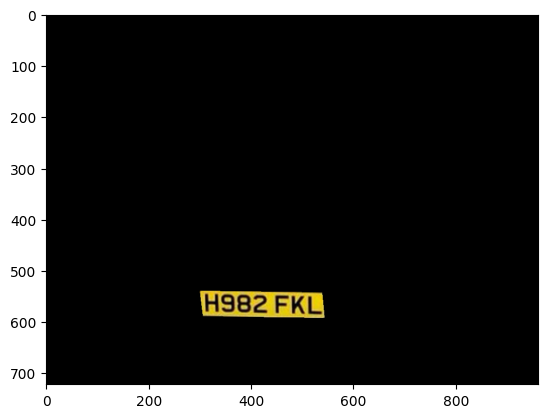

In [58]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [59]:
(x,y)=np.where(mask== 255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x), np.max(y))
cropped_image=gray_scale_img[x1:x2+1, y1:y2+1]

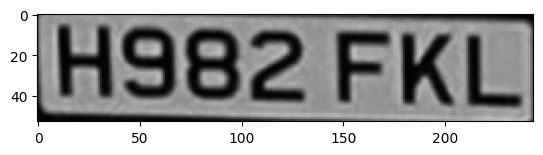

In [60]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [61]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.6943034655101045)]

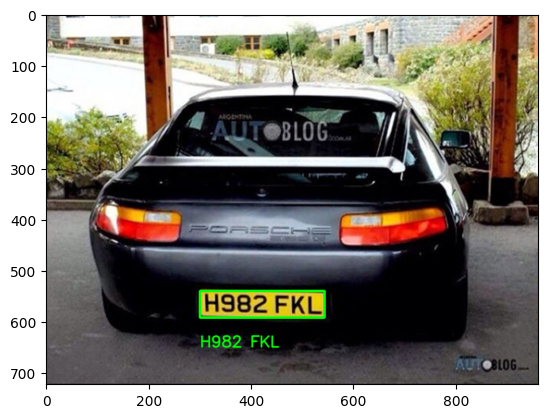

In [62]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font, fontScale=1,color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)
res=cv2.rectangle(img, tuple(approx[0][0]),tuple(approx[2][0]),( 0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))